In [221]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
# from sklearn.metrics import confusion_matrix , classification_report
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
tf.random.set_seed(1234)
import os
import random
from keras.layers import LeakyReLU

In [222]:
import seaborn as sns

In [223]:
os.environ['PYTHONHASHSEED']=str(42)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [224]:
df=pd.read_excel("data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3,NaN,NaN,NaN,NaN,NaN
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0,NaN,NaN,NaN,NaN,NaN
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5,NaN,NaN,NaN,NaN,NaN
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0,NaN,NaN,NaN,NaN,NaN
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0,NaN,NaN,NaN,NaN,NaN


In [225]:
data= df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]


In [226]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566,4.3
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566,10.0
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566,17.5
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566,31.0
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566,34.0


In [227]:
X= data[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']]

In [228]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.2,566
1,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,0.5,566
2,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,1.0,566
3,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,3.0,566
4,17.54,5.67,7.8,0.003,68.98,0.0,0.0,99.993,7.0,566


In [229]:
Y= data['X11']

In [230]:
Y.head()

0     4.3
1    10.0
2    17.5
3    31.0
4    34.0
Name: X11, dtype: float64

In [231]:
#We check the number of unique values in each column
a=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
for i in a:
    print(len(X[i].unique()))

18
17
17
8
18
17
9
14
55
52


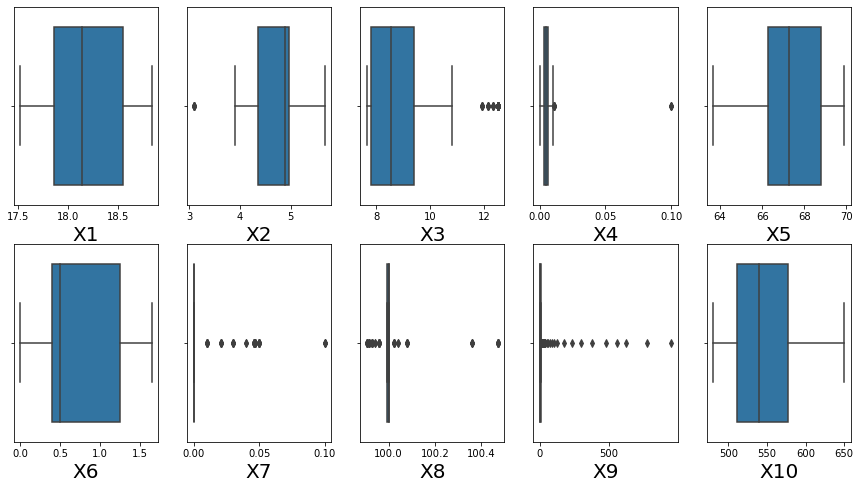

In [126]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot o
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(X.columns, ax.flatten()):
    z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  


In [127]:
# #this code reduces the  above outliers seen. This is done by chaning the values in the box plot based on inter quantile range 
# for i in X.columns:
#     q1=X[i].quantile(0.25)
#     q3=X[i].quantile(0.75)
#     iqr=q3-q1
#     ub=q3 + 1.5*iqr
#     lb=q1 - 1.5*iqr
#     uc=X[i].quantile(0.99)
#     lc=X[i].quantile(0.01)
#     for ind1 in X[i].index:
#         if X.loc[ind1, i] >ub:            
#             X.loc[ind1, i] =uc
#         if X.loc[ind1, i] < lb:
#             X.loc[ind1, i] =lc


In [128]:
# # plot the boxplot for each variable
# # subplots(): plot subplots
# # figsize(): set the figure size
# fig, ax = plt.subplots(2, 5, figsize=(15, 8))

# # plot the boxplot using boxplot() from seaborn
# # z: let the variable z define the boxplot
# # x: data for which the boxplot is to be plotted
# # orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# # whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# # ax: specifies the axes object to draw the plot o
# # set_xlabel(): set the x-axis label
# # fontsize: sets the font size of the x-axis label
# for variable, subplot in zip(X.columns, ax.flatten()):
#     z = sns.boxplot(x = X[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
#     z.set_xlabel(variable, fontsize = 20)  


In [129]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [130]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
# X_train_std = sc.fit_transform(X_train)
# X_test_std = sc.transform(X_test)


In [144]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_std = sc.fit_transform(X)


In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_min = scaler.fit_transform(X)

In [146]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [167]:
#principal component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_std)

In [168]:
X_pca.shape
PCA_df = pd.DataFrame(data = X_pca)
PCA_df.head()

,0,1,2,3,4,5,6,7,8
0,-1.933396,-1.815459,-1.149201,-0.169943,0.471828,-0.398843,-0.064216,0.064176,0.435945
1,-1.933780,-1.815191,-1.147765,-0.170004,0.473926,-0.398018,-0.064108,0.064483,0.436006
2,-1.934420,-1.814744,-1.145372,-0.170107,0.477423,-0.396643,-0.063928,0.064995,0.436107
3,-1.936979,-1.812956,-1.135800,-0.170517,0.491409,-0.391141,-0.063210,0.067044,0.436512
4,-1.942098,-1.809381,-1.116655,-0.171336,0.519382,-0.380137,-0.061773,0.071141,0.437322


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(PCA_df, Y, test_size=0.20, random_state=101)

In [180]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [181]:
from sklearn.neural_network import MLPRegressor
os.environ['PYTHONHASHSEED']=str(1234)
tf.random.set_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [209]:
reg = MLPRegressor(hidden_layer_sizes=(64,16,8),alpha=0.001,solver='adam',activation='relu',random_state=1, max_iter=1300,verbose=1, early_stopping=False).fit(X_train, Y_train)


Iteration 1, loss = 111.60338596
Iteration 2, loss = 111.12385539
Iteration 3, loss = 110.63300504
Iteration 4, loss = 110.12898742
Iteration 5, loss = 109.62136623
Iteration 6, loss = 109.11382367
Iteration 7, loss = 108.60221107
Iteration 8, loss = 108.08533991
Iteration 9, loss = 107.55310098
Iteration 10, loss = 107.00524324
Iteration 11, loss = 106.44779712
Iteration 12, loss = 105.88021246
Iteration 13, loss = 105.30136194
Iteration 14, loss = 104.71164455
Iteration 15, loss = 104.10771545
Iteration 16, loss = 103.48844822
Iteration 17, loss = 102.86170915
Iteration 18, loss = 102.22454426
Iteration 19, loss = 101.57447341
Iteration 20, loss = 100.91799958
Iteration 21, loss = 100.25208952
Iteration 22, loss = 99.57191812
Iteration 23, loss = 98.88217564
Iteration 24, loss = 98.17646527
Iteration 25, loss = 97.45382419
Iteration 26, loss = 96.71323738
Iteration 27, loss = 95.94942715
Iteration 28, loss = 95.16092288
Iteration 29, loss = 94.35468013
Iteration 30, loss = 93.5317182

Iteration 296, loss = 16.69767523
Iteration 297, loss = 16.67766619
Iteration 298, loss = 16.65769975
Iteration 299, loss = 16.63759356
Iteration 300, loss = 16.61727408
Iteration 301, loss = 16.59735400
Iteration 302, loss = 16.57776900
Iteration 303, loss = 16.55817839
Iteration 304, loss = 16.53860001
Iteration 305, loss = 16.51884397
Iteration 306, loss = 16.49869840
Iteration 307, loss = 16.47861667
Iteration 308, loss = 16.45909124
Iteration 309, loss = 16.43974296
Iteration 310, loss = 16.42051421
Iteration 311, loss = 16.40203609
Iteration 312, loss = 16.38351831
Iteration 313, loss = 16.36491836
Iteration 314, loss = 16.34649979
Iteration 315, loss = 16.32778766
Iteration 316, loss = 16.30900902
Iteration 317, loss = 16.29017385
Iteration 318, loss = 16.27113054
Iteration 319, loss = 16.25261687
Iteration 320, loss = 16.23450788
Iteration 321, loss = 16.21573194
Iteration 322, loss = 16.19708909
Iteration 323, loss = 16.17905114
Iteration 324, loss = 16.16068562
Iteration 325,

In [210]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [211]:
y_pred=reg.predict(X_train)
print("The Score with ", (r2_score(y_pred, Y_train)))

The Score with  0.7204997916860563


In [212]:
y_pred=reg.predict(X_test)
print("The Score with ", (r2_score(y_pred, Y_test)))

The Score with  0.48323822382565174


In [232]:
#Tensorflow library. Used to implement machine learning models
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [233]:
hiddenUnits = 20
visibleUnits = len(X)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique movies
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

In [234]:
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)


In [235]:
#Learning rate
alpha = 1.0
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)


In [236]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)


In [237]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())


In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

In [239]:
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(X_train), batchsize), range(batchsize, len(X_train), batchsize)):
        batch = X_train[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: train_X, W: cur_w, vb: cur_vb, hb: cur_nb}))
    print (errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()


ValueError: Cannot feed value of shape (100, 10) for Tensor 'Placeholder_7:0', which has shape '(?, 219)'